In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
df_with_genre_list = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [4]:
relevant_genres

,genre,quantity
0,pop,2945
1,dance pop,2574
2,pop rap,2110
3,rap,1725
4,post-teen pop,1496
5,hip hop,1283
6,r&b,1277
7,contemporary country,1212
8,southern hip hop,1132
9,country,1130


In [5]:
#agrupa por gênero para tirar estatísticas
def group_by_genre(relevant_genres, df_genre_rank):    
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = df_genre_rank[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == 1]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]
        
        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

In [6]:
genre_stats = group_by_genre(relevant_genres, df_with_genre_list)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.299505,15.967822,82.117987
country,49.975221,16.169912,82.679646
country road,50.584699,16.113843,82.539162
dance pop,40.780886,14.259518,72.769619
hip hop,46.874513,12.737334,77.037412
hip pop,40.401075,16.301075,75.610753
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
post-teen pop,42.266711,12.546123,71.719920
r&b,39.548160,16.174628,74.144871


In [7]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = df_with_genre_list.sample(size, replace=True)
        values.append(group_by_genre(relevant_genres, sample)['peak_pos'])
    return values

In [8]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [9]:
bootstrap_result = pd.DataFrame(bootstrap(df_with_genre_list ,1000))
bootstrap_result

,contemporary country,country,country road,dance pop,hip hop,hip pop,pop,pop rap,post-teen pop,r&b,rap,southern hip hop,trap music,urban contemporary
peak_pos,51.443350,51.001759,51.614067,40.573995,49.271104,40.561422,43.364545,45.477416,41.801724,39.093581,48.833030,50.510738,52.750577,40.841897
peak_pos,49.795798,48.699535,49.862595,42.049116,47.976172,42.930630,44.302119,46.888199,42.418374,41.719453,49.149036,51.000914,55.362637,42.458333
peak_pos,50.360629,49.866310,50.609290,39.872624,46.177382,39.769716,42.620219,43.815764,40.828073,37.582946,46.458621,47.908146,50.983193,38.898855
peak_pos,49.634335,49.743119,49.849953,40.553483,46.501979,41.066890,42.684297,44.604927,42.135048,40.235623,47.337647,48.396884,52.488268,40.814150
peak_pos,50.978706,50.297853,51.471664,41.529094,47.937252,41.420112,43.951884,45.248207,42.232237,39.477220,48.356677,50.931608,53.744705,39.442064
peak_pos,50.336815,49.882739,49.979532,40.106072,46.264063,39.329437,43.497506,43.948682,41.216433,38.446565,47.083144,48.268827,52.509110,38.602624
peak_pos,50.654575,50.577601,51.045126,40.571981,46.311628,41.156425,42.873621,43.746485,41.785388,40.197692,46.470890,47.765333,51.346609,41.071285
peak_pos,50.479668,50.366843,50.787770,40.601089,47.348462,38.717557,43.700725,44.626124,42.294233,38.721658,47.970404,49.631162,51.967056,38.985119
peak_pos,50.586938,50.356250,51.520484,39.189702,47.356748,40.196352,41.993223,44.044847,41.159653,37.914443,47.663972,49.465517,52.832069,38.051808
peak_pos,50.065452,49.885563,49.980144,41.078476,46.960618,40.586283,43.990823,45.105556,41.996089,39.343846,48.247350,48.530213,53.116402,39.250735


In [10]:
bootstrap_result = bootstrap_result.reindex(bootstrap_result.mean().sort_values().index, axis=1)

In [11]:
result_copy = bootstrap_result.copy()
averages = result_copy.mean()
averages_sorted = averages.sort_values()

In [12]:
real_peak_pos = {"a": 40}
keys = averages_sorted.keys()
for i in range(len(averages_sorted)):
    for j in genre_stats.index:
        if j == keys[i]:
            real_peak_pos[keys[i]] = genre_stats.get_value(j, col='peak_pos')

real_peak_pos = pd.Series(real_peak_pos)
real_peak_pos

C:\Users\Juliana\IBRAHIM\Development\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                       40.000000
r&b                     39.548160
urban contemporary      39.831349
hip pop                 40.401075
dance pop               40.780886
post-teen pop           42.266711
pop                     43.577250
pop rap                 44.524171
hip hop                 46.874513
rap                     47.384348
southern hip hop        48.575972
country                 49.975221
contemporary country    50.299505
country road            50.584699
trap music              52.410423
dtype: float64

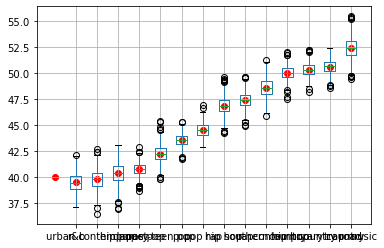

In [13]:


bootstrap_result.boxplot()
plt.scatter(y=real_peak_pos.values, x=real_peak_pos.keys(), color='red')
plt.show()



In [14]:
bootstrap_top5 = bootstrap_result.loc[:, real_peak_pos.index[1:6]]
bootstrap_bottom5 = bootstrap_result.loc[:, real_peak_pos.index[-5:]]
bootstrap_top5

,r&b,urban contemporary,hip pop,dance pop,post-teen pop
peak_pos,39.093581,40.841897,40.561422,40.573995,41.801724
peak_pos,41.719453,42.458333,42.930630,42.049116,42.418374
peak_pos,37.582946,38.898855,39.769716,39.872624,40.828073
peak_pos,40.235623,40.814150,41.066890,40.553483,42.135048
peak_pos,39.477220,39.442064,41.420112,41.529094,42.232237
peak_pos,38.446565,38.602624,39.329437,40.106072,41.216433
peak_pos,40.197692,41.071285,41.156425,40.571981,41.785388
peak_pos,38.721658,38.985119,38.717557,40.601089,42.294233
peak_pos,37.914443,38.051808,40.196352,39.189702,41.159653
peak_pos,39.343846,39.250735,40.586283,41.078476,41.996089


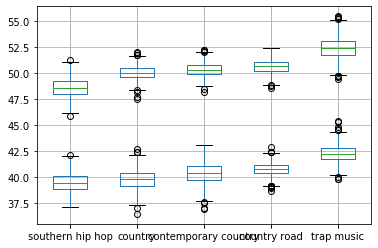

In [15]:
bootstrap_top5.boxplot()
bootstrap_bottom5.boxplot()

plt.show()

Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop) têm uma chance maior de alcançar posições mais altas.<br><br>


Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop) têm uma chance maior de alcançar posições mais altas.
